In [1]:
from math import sqrt
from scipy.optimize import minimize
from numpy.random import rand
import numpy as np
import matplotlib.pyplot as plt

## Probability parameters

Set parameters for probability function using $p(x) = \dfrac{x^a}{b + x^a}$ for $a \in [0,1]$ and $b > 0$.

In [2]:
a = round(100 * rand()) / 100
b = round(100 * rand()) / 100
print('a:', a,
      'b:', b)

a: 0.13 b: 0.21


Next line creates probability function and $g(x) = \dfrac{p(x)}{p'(x)} = \dfrac{x(x^a + b)}{ab}$

In [3]:
assert a >= 0 and a <= 1, 'Set a in [0,1]'
assert b > 0, 'Set b > 0'
p = lambda x: x**a / (b + x**a)
q = lambda x: x**(1/2) / (1/4 + x**(1/2))
g = lambda x: x * (x**a + b) / (a * b)

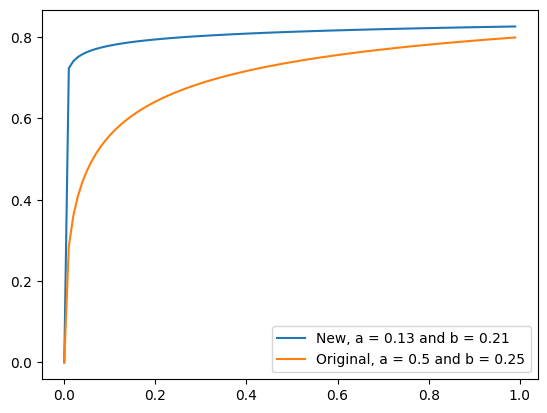

In [4]:
X = np.arange(0,1,.01)
Y = np.array([p(x) for x in X])
Yorig = np.array([q(x) for x in X])
plt.plot(X,Y)
plt.plot(X,Yorig)
plt.legend(['New, a = ' + str(a)[:4] + ' and b = ' + str(b),'Original, a = 0.5 and b = 0.25'])

## Initiator-optimal alpha-rule

Consider first the problem of finding the initiator-optimal alpha-rule. Specifically, each agent $i > 0$ will invest $x_i = c$ such that $p(c) \alpha = g(c)$. The initiator's expected payoff is
$$
(1 - p(x_0)) \cdot 1 + p(x_0) (1 - p(c)) \cdot 2 + p(x_0) p(c) (1 - p(c)) (2 + 1 - \alpha) + p(x_0) p^2(c) (1 - p(c)) (2 + 2(1 - \alpha)) + \dots - x_0
$$
This simplifies to 
$$
(1 - p(x_0)) + 2 p(x_0) (1 - p(c)) (1 + p(c) + p^2(c) + \dots) + p(x_0) p(c) (1 - p(c)) (1 - \alpha) (1 + 2p(c) + 3p^2(c) + \dots) - x_0,
$$
which becomes
$$
1 - p(x_0) + 2 p(x_0) + \dfrac{p(x_0) p(c) (1 - \alpha)}{1 - p(c)} - x_0.
$$
Simplifying further,
$$
1 + p(x_0) \left(1 + \dfrac{p(c) (1 - \alpha)}{1 - p(c)} \right) - x_0.
$$
which is
$$
1 + p(x_0) \left(\dfrac{1 - p(c) + p(c) - p(c) \alpha}{1 - p(c)} \right) - x_0,
$$
so
$$
1 + p(x_0) \left(\dfrac{1 - p(c) \alpha}{1 - p(c)} \right) - x_0.
$$
We incorporate the FOC for agents $i > 0$, namely $p(c) \alpha = g(c)$, and maximize the resulting expression with respect to $x_0$ and $c$:
$$
1 + p(x_0) \left( \dfrac{1 - g(c)}{1 - p(c)} \right ) - x_0.
$$
In particular, x[0] is $x_0$ while x[1] is $c$.
Instead of maximizing the function, we minimize the negative function.
We add also an initial guess x0 and non-negativity bounds.

In [5]:
initFun = lambda x: - (1 + p(x[0]) * (1 - g(x[1])) / (1 - p(x[1])) - x[0])
x0 = [1, 1]
bnds = [(0, None), (0, None)]
f = minimize(fun = initFun, x0 = x0, bounds = bnds)
# f.x is the solution, namely the investments [x0, c]
# f.fun is the (negative) function value at the optimum
c = f.x[1]
alpha = g(c) / p(c)

print(f)
print('-------------------------------------------------------------------------')
print('Init. investment x0:\t', f.x[0])
print('Other investment c:\t', c)
print('Init. prob. p(x0):\t', p(f.x[0]))
print('Other prob. p(c):\t', p(c))
print('Alpha:\t\t\t', alpha)

      fun: -3.240337437828229
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.16795462e-05, 6.60227428e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 90
      nit: 18
     njev: 30
   status: 0
  success: True
        x: array([0.06881043, 0.00305496])
-------------------------------------------------------------------------
Init. investment x0:	 0.06881043367060796
Other investment c:	 0.0030549621659848973
Init. prob. p(x0):	 0.7707791190922817
Other prob. p(c):	 0.6916446155790631
Alpha:			 0.11018638808819649


## Two-optimality with alpha-rule

Assume now that the rule starts
\begin{align*}
& (1), \\
& (2, 0), \\
& (A, B, 3-A-B), \\
& (C, D, 4-C-D, 0), \\
& (C, D, 4-C-D + 1-\alpha, \alpha, 0), \\
& (C, D, 4-C-D + 2(1-\alpha), \alpha, \alpha, 0), \\
& \dots
\end{align*}
where $\alpha$ is as for the initiator-optimal alpha-rule above.
Therefore, we will have $x_3 = x_4 = \dots = c$ as above.

### Agent 0's FOC

For agent $0$, the expected return if successful $R_0$ is
\begin{align*}
R_0 &= (1 - p(x_1)) \cdot 2 + p(x_1) (1 - p(x_2)) \cdot A + p(x_1) p(x_2) (1 + p(c) + p^2(c) + \dots) (1 - p(c)) \cdot C \\
&= (1 - p(x_1)) \cdot 2 + p(x_1) (1 - p(x_2)) \cdot A + p(x_1) p(x_2) \cdot C \\
&= 2 - 2p(x_1) + A p(x_1) - A p(x_1) p(x_2) + C p(x_1) p(x_2) \\
&= 2 + (A - 2) p(x_1) + (C - A) p(x_1) p(x_2).
\end{align*}

Agent $0$'s FOC is $p(x_0) (R_0 - 1) = g(x_0)$, so
$$
1 + (A-2) p(x_1) + (C - A) p(x_1) p(x_2) = \frac{g(x_0)}{p(x_0)}.
$$

### Agent 1's FOC

For agent $1$, the expected return if successful $R_1$ is
\begin{align*}
R_1 &= (1 - p(x_2)) \cdot B + p(x_2) (1 + p(c) + p^2(c) + \dots) (1 - p(c)) \cdot D \\
&= (1 - p(x_2)) \cdot B + p(x_2) \cdot D \\
&= B + (D - B) p(x_2)
\end{align*}

Agent $1$'s FOC is $p(x_1) (R_1 - 0) = g(x_1)$, so
$$
B + (D - B) p(x_2) = \frac{g(x_1)}{p(x_1)}.
$$

### Agent 2's expected payoff

Finally, we turn to agent $2$'s expected payoff:
$$
p(x_0) p(x_1) (1 - p(x_2)) (3 - A - B) + p(x_0) p(x_1) p(x_2) (1 + p(c) + p^2(c) + \dots) (1 - p(c)) (4 - C - D) + p(x_0) p(x_1) p(x_2) (p(c) + 2p^2(c) + \dots) (1 - p(c)) (1 - \alpha) - p(x_0) p(x_1) x_2
$$
This simplifies to
$$
p(x_0) p(x_1) (1 - p(x_2)) (3 - A - B) + p(x_0) p(x_1) p(x_2) (4 - C - D) + \dfrac{p(x_0) p(x_1) p(x_2) p(c) (1 - \alpha)}{1 - p(c)} - p(x_0) p(x_1) x_2
$$
Rearranging,
$$
p(x_0) p(x_1) (3 - A - B - x_2) + p(x_0) p(x_1) p(x_2) (1 + A + B - C - D) + \dfrac{p(x_0) p(x_1) p(x_2) p(c) (1 - \alpha)}{1 - p(c)}
$$
Define $Z = \dfrac{p(c) (1 - \alpha)}{1 - p(c)}$.
Note that this only depends on the already computed values.
Then
$$
p(x_0) p(x_1) (3 - A - B - x_2) + p(x_0) p(x_1) p(x_2) (1 + A + B - C - D + Z).
$$

In [6]:
Z = p(c) * (1 - alpha) / (1 - p(c))
print(Z)

1.9958619976864909


### Constrained optimization problem 

We will choose $x_0$, $x_1$, $x_2$, $A$, $B$, $C$, and $D$ to maximize agent $2$'s expected payoff.
The list x = [$x_0, x_1, x_2, A, B, C, D$] will represent the solution.
Hence, x[3] refers to the payoff $A$.
Again, we minimize the negative function and impose non-negativity bounds.

In [7]:
fun = lambda x: - (p(x[0]) * p(x[1]) * (3 - x[3] - x[4] - x[2]) + p(x[0]) * p(x[1]) * p(x[2]) * (1 + x[3] + x[4] - x[5] - x[6] + Z))
x0 = [1, 1, 1, 1, 1, 1, 1]
bnds = [(0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None)]

Next, we add constraints. First, $A + B \leq 3$ and $C + D \leq 4$. We indicate that it's an inequality and then the function that should be non-negative. Hence, the middle row captures $3 - A - B >= 0$.

In [8]:
cons = []
cons.append({'type': 'ineq', 'fun': lambda x: 3 - x[3] - x[4]})
cons.append({'type': 'ineq', 'fun': lambda x: 4 - x[5] - x[6]})

Next, we turn to the equilibrium constraints. We compute the FOCs for agents $0$ and $1$ above.
For these equality constraints, we provide the function that should equal zero.
\begin{align*}
1 + (A-2) p(x_1) + (C - A) p(x_1) p(x_2) &= \frac{g(x_0)}{p(x_0)} \\
B + (D - B) p(x_2) &= \frac{g(x_1)}{p(x_1)}.
\end{align*}


In [9]:
cons.append({'type': 'eq', 'fun': lambda x: 1 + (x[3] - 2) * p(x[1]) + (x[5] - x[3]) * p(x[1]) * p(x[2]) - g(x[0]) / p(x[0])})
cons.append({'type': 'eq', 'fun': lambda x: x[4] + (x[6] - x[4]) * p(x[2]) - g(x[1]) / p(x[1])})

In [10]:
f = minimize(fun = fun, x0 = x0, bounds = bnds, constraints = cons)
# f.x is the solution, namely [x0, x1, x2, A, B, C, D]
# f.fun is the (negative) function value at the optimum
print(f)
print('-------------------------------------------------------------------------')
print('Init. investment x0:\t', f.x[0])
print('Investment x1:\t\t', f.x[1])
print('Investment x2:\t\t', f.x[2])
print('Investment c:\t\t', c)
print('Init. prob. p(x0):\t', p(f.x[0]))
print('Prob. p(x1):\t\t', p(f.x[1]))
print('Prob. p(x2):\t\t', p(f.x[2]))
print('Prob. p(c):\t\t', p(c))
print('A:\t\t\t',f.x[3])
print('B:\t\t\t',f.x[4])
print('C:\t\t\t',f.x[5])
print('D:\t\t\t',f.x[6])

     fun: -2.1130887187004537
     jac: array([-26.31551179, -25.73510632,  -0.04772648,   0.11016712,
         0.11016712,   0.37043527,   0.37043527])
 message: 'Optimization terminated successfully'
    nfev: 236
     nit: 27
    njev: 27
  status: 0
 success: True
       x: array([0.00320498, 0.00327123, 0.06879167, 0.94941747, 0.12276763,
       0.65851211, 0.11708999])
-------------------------------------------------------------------------
Init. investment x0:	 0.0032049844633225562
Investment x1:		 0.0032712297603978645
Investment x2:		 0.06879167228696166
Investment c:		 0.0030549621659848973
Init. prob. p(x0):	 0.6929721825193473
Prob. p(x1):		 0.6935377608663251
Prob. p(x2):		 0.7707728558181394
Prob. p(c):		 0.6916446155790631
A:			 0.9494174706409692
B:			 0.12276763129491693
C:			 0.6585121079026218
D:			 0.11708998824235271


/var/folders/fy/tqrt4js16sb__tbx7f8rk589vv_z38/T/ipykernel_23261/1305883556.py:1: RuntimeWarning: invalid value encountered in double_scalars
  cons.append({'type': 'eq', 'fun': lambda x: 1 + (x[3] - 2) * p(x[1]) + (x[5] - x[3]) * p(x[1]) * p(x[2]) - g(x[0]) / p(x[0])})


## Further constrained problem

The optimization problem may have multiple solutions.
If there is one with $C = D = 0$, then that solution is also a solution to the problem in which we maximize agent $2$'s expected payoff minus $C$ and $D$.
Hence, we can compare the optimal function values: if there is no difference, then this suggests that there exists a solution with $C = D = 0$.
(Again, due to minimizing, we add $C$ and $D$ instead.)
However, it may also be the case that $x_0$ and $x_1$ are large enough to require $C, D > 0$.
But when this is the case, we want $A + B = 3$, that is, agent $2$ should not receive a positive self-transfer.
In this way, we add $(3 - A - B) \cdot (C + D)$ to the objective function that we are minimizing.

In [11]:
consFun = lambda x: fun(x) + (3 - x[3] - x[4]) * (x[5] + x[6])

In [12]:
g = minimize(fun = consFun, x0 = x0, bounds = bnds, constraints = cons)
# f.x is the solution, namely [x0, x1, x2, A, B, C, D]
# f.fun is the (negative) function value at the optimum
print(g)
print('-------------------------------------------------------------------------')
print('Init. investment x0:\t', g.x[0])
print('Investment x1:\t\t', g.x[1])
print('Investment x2:\t\t', g.x[2])
print('Investment c:\t\t', c)
print('Init. prob. p(x0):\t', p(g.x[0]))
print('Prob. p(x1):\t\t', p(g.x[1]))
print('Prob. p(x2):\t\t', p(g.x[2]))
print('Prob. p(c):\t\t', p(c))
print('A:\t\t\t',g.x[3])
print('B:\t\t\t',g.x[4])
print('C:\t\t\t',g.x[5])
print('D:\t\t\t',g.x[6])

     fun: -2.1130886641703652
     jac: array([-26.32924023, -25.76303297,  -0.44598606,  -0.09207022,
        -0.09207022,   0.3704477 ,   0.3704477 ])
 message: 'Optimization terminated successfully'
    nfev: 316
     nit: 36
    njev: 36
  status: 0
 success: True
       x: array([0.00320484, 0.00327201, 0.06883371, 2.67566701, 0.32433299,
       0.14517889, 0.05718828])
-------------------------------------------------------------------------
Init. investment x0:	 0.0032048423366262033
Investment x1:		 0.003272014123616274
Investment x2:		 0.0688337086987339
Investment c:		 0.0030549621659848973
Init. prob. p(x0):	 0.692970955936959
Prob. p(x1):		 0.693544385195797
Prob. p(x2):		 0.7707868866552084
Prob. p(c):		 0.6916446155790631
A:			 2.675667010598761
B:			 0.3243329894012395
C:			 0.14517888791933817
D:			 0.05718827556101409


/var/folders/fy/tqrt4js16sb__tbx7f8rk589vv_z38/T/ipykernel_23261/1305883556.py:1: RuntimeWarning: invalid value encountered in double_scalars
  cons.append({'type': 'eq', 'fun': lambda x: 1 + (x[3] - 2) * p(x[1]) + (x[5] - x[3]) * p(x[1]) * p(x[2]) - g(x[0]) / p(x[0])})


The important comparison is then the following:

In [13]:
print('Unconstrained:\t', f.fun)
print('Constrained:\t', g.fun)
print()
if (f.fun < g.fun + 1e-3 and f.fun > g.fun - 1e-3): 
    if (g.x[3] + g.x[4] > 3 - 1e-6):
        print("Constraints don't affect optimal value, there is no self-transfer")
    if (g.x[5] + g.x[6] < 1e-6):
        print("Constraints don't affect optimal value, values can be set to zero")
    
else: print("Constraints DO affect optimal value")

Unconstrained:	 -2.1130887187004537
Constrained:	 -2.1130886641703652

Constraints don't affect optimal value, there is no self-transfer
